## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [18]:
## 
"""
Your code here (optional)
確認硬體資源
"""


'\nYour code here (optional)\n確認硬體資源\n'

In [19]:
import os
import keras

# 請嘗試設定 GPU：os.environ


In [20]:
train, test = keras.datasets.cifar10.load_data()

In [21]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x):
    x=2*(x-x.min())/(x.max()-x.min())-1
    x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [22]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [23]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128,64,32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330 

In [24]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [25]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [26]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 10s 205us/step - loss: 2.2439 - accuracy: 0.1547 - val_loss: 2.1930 - val_accuracy: 0.1824
Epoch 2/100
50000/50000 [==============================] - 10s 201us/step - loss: 2.1467 - accuracy: 0.2107 - val_loss: 2.1515 - val_accuracy: 0.2132
Epoch 3/100
50000/50000 [==============================] - 10s 209us/step - loss: 2.0698 - accuracy: 0.2456 - val_loss: 2.0841 - val_accuracy: 0.2414
Epoch 4/100
50000/50000 [==============================] - 11s 212us/step - loss: 2.0146 - accuracy: 0.2707 - val_loss: 2.0207 - val_accuracy: 0.2620
Epoch 5/100
50000/50000 [==============================] - 11s 218us/step - loss: 1.9758 - accuracy: 0.2859 - val_loss: 2.0034 - val_accuracy: 0.2714
Epoch 6/100
50000/50000 [==============================] - 10s 208us/step - loss: 1.9335 - accuracy: 0.3058 - val_loss: 1.9794 - val_accuracy: 0.2786
Epoch 7/100
50000/50000 [=========================

50000/50000 [==============================] - 7s 147us/step - loss: 0.5535 - accuracy: 0.8047 - val_loss: 4.3743 - val_accuracy: 0.2851
Epoch 56/100
50000/50000 [==============================] - 7s 147us/step - loss: 0.4903 - accuracy: 0.8282 - val_loss: 4.4606 - val_accuracy: 0.2883
Epoch 57/100
50000/50000 [==============================] - 7s 147us/step - loss: 0.5098 - accuracy: 0.8199 - val_loss: 4.4997 - val_accuracy: 0.2917
Epoch 58/100
50000/50000 [==============================] - 8s 154us/step - loss: 0.5594 - accuracy: 0.8026 - val_loss: 4.4947 - val_accuracy: 0.2813
Epoch 59/100
50000/50000 [==============================] - 9s 171us/step - loss: 0.4673 - accuracy: 0.8358 - val_loss: 4.7440 - val_accuracy: 0.2786
Epoch 60/100
50000/50000 [==============================] - 8s 167us/step - loss: 0.4598 - accuracy: 0.8389 - val_loss: 4.7768 - val_accuracy: 0.2826
Epoch 61/100
50000/50000 [==============================] - 8s 167us/step - loss: 0.4333 - accuracy: 0.8492 - val

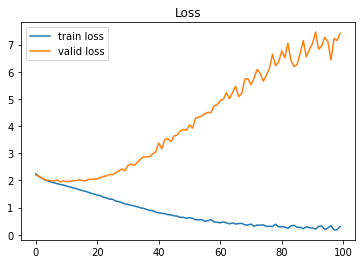

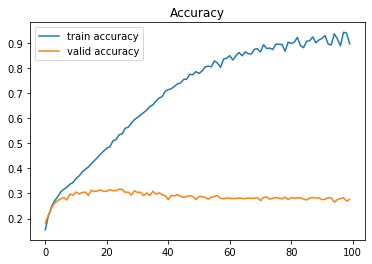

In [28]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()